In [23]:
import pandas as pd
import numpy as np
from pylab import mpl, plt

rawdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sma_dataset.csv',
index_col=0, parse_dates=True).dropna()
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [24]:
datagold= pd.DataFrame(rawdata['XAU='])
datagold.rename(columns={'XAU=': 'price'}, inplace=True)
datagold['returns'] = np.log(datagold['price'] / datagold['price'].shift(1))

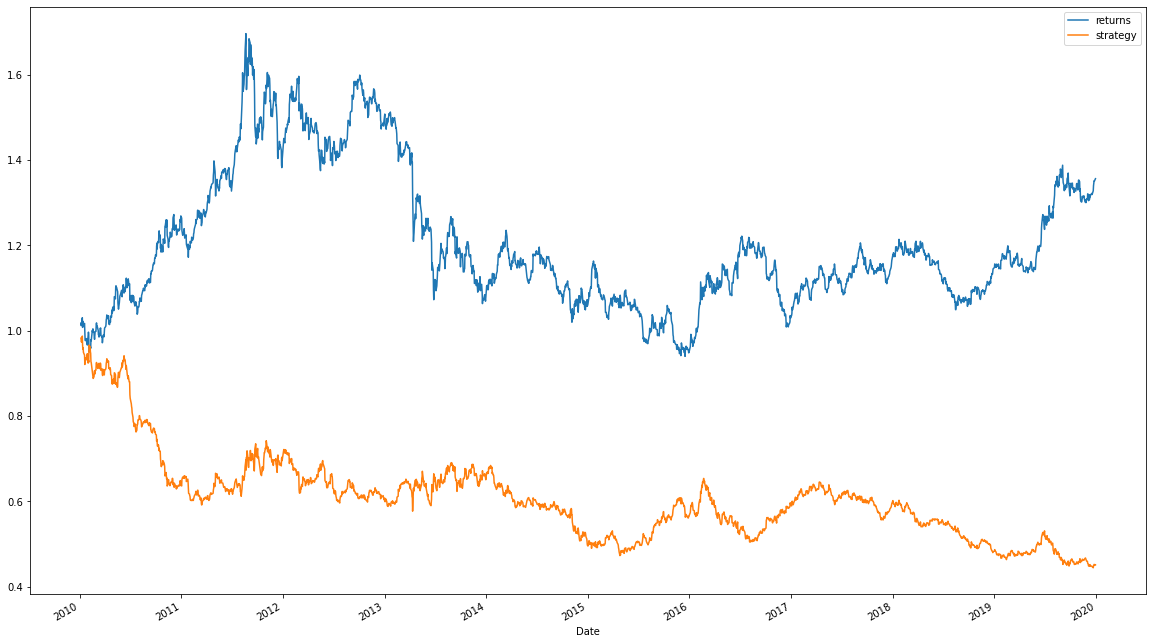

In [25]:
datagold['position'] = np.sign(datagold['returns'])
datagold['strategy'] = datagold['position'].shift(1) * datagold['returns']
datagold[['returns', 'strategy']].dropna().cumsum(
).apply(np.exp).plot(figsize=(20, 12));

In [26]:
to_plot = ['returns']

for m in [2, 3, 4, 5, 6]:
  datagold['position_%d' % m] = np.sign(datagold['returns'].rolling(m).mean())
  datagold['strategy_%d' % m] = (datagold['position_%d' % m].shift(1) *
  datagold['returns'])
  to_plot.append('strategy_%d' % m)

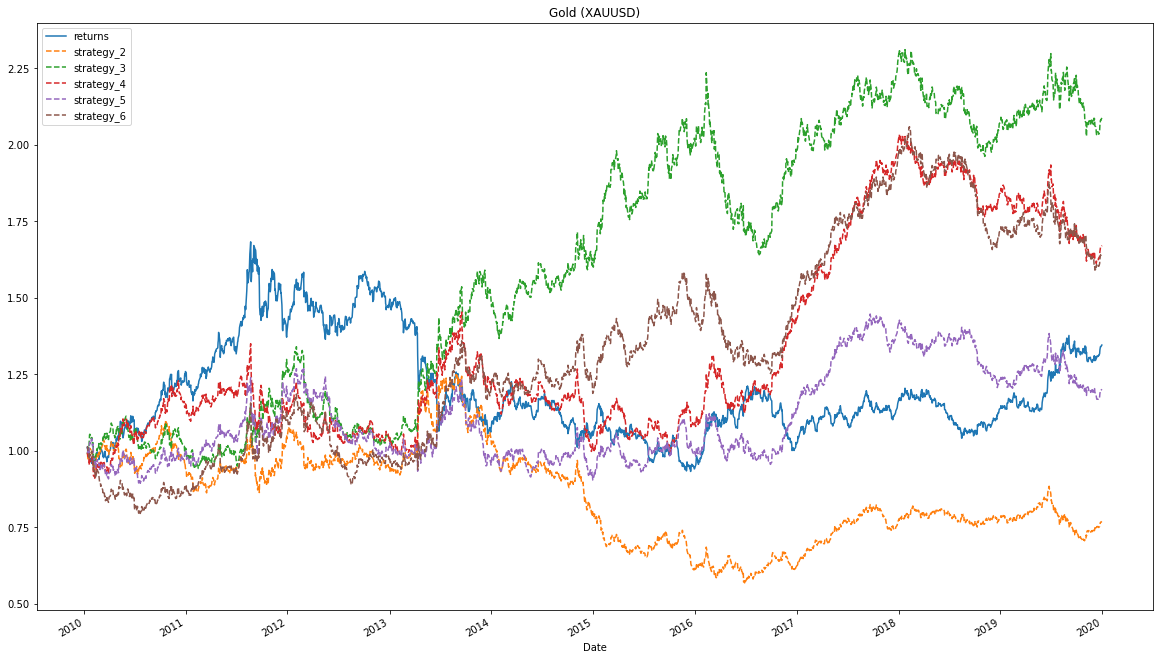

In [27]:
datagold[to_plot].dropna().cumsum().apply(np.exp).plot(
title='Gold (XAUUSD)',
figsize=(20, 12), style=['-', '--', '--', '--', '--', '--']);